# Writer Notes:

Since this lecture mainly consists of discussion questions, I did the questions on my own in this file before going through the video lectures. 

In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Discussion Question 1
1. Population: Income with `mean` 10K and `SD` 20k
2. Sample: `100` chosen uniformly at random with replacement

### What's the chance that the sample `mean` is above 14k?

### My Answer:
\begin{equation*}
sample`mean`SD = \frac{population`SD}{\sqrt{sample`size}}
\end{equation*}

From the formula above, we can calculate the sample mean `SD` by the following,
\begin{equation*}
sample`mean`SD = \frac{20,000}{\sqrt{100}} = \frac{20,000}{10} = 2,000
\end{equation*}

The calculated sample mean `SD` is 2,000. From lecture 28, assuming the sample mean probability distribution is roughly normal, the center of the sample mean is the population mean, 10k. 

This means `1``SD` away from the sample mean center is 8k on the left side and 12k on the right side. `2` `SD` away from the sample mean center is 6k on the left side and 14k on the right side.

Now recall the following table,

| Percent in Range | All Distributions | Normal Distribution |
| --- | ---- | ----|
| Average $\pm$ 1 SDs | at least 0% | about 68%|
| Average $\pm$ 2 SDs | at least 75% | about 95%|
| Average $\pm$ 3 SDs | at least 88.888...%| about 99.73%|

Assuming **Normal Distribution**, an average with 2 `SD`s away would cover about 95% of the data. The rest 5% of the data are divided into 2 parts (assuming normal distribution, the distribution is symmetrically shaped): 2.5% left tail and 2.5% right tail. The 2.5% right tail is the area where the sample income are greater than 14k.

Thus, **the chance that the sample mean is above 14k is 2.5%!**

## Discussion Question 2
1. Population: A perfect bell shape. `Mean` = 10, `SD` = 20
2. Sample: `100` chosen uniformly at random with replacement

### What's the chance that every single value in the sample is below 50?

### Answer:
Since it is mentioned that the population distribution is **a perfect bell shape**, the distribution is **normal**. This means the center of the sample mean distribution should be also `10`.

Since it asks for every single value in the sample, we can break down the problem to small parts. Start with find the chance that `1` value is below `50`. This is the same as taking a sample with sample size `1`. With sample size `1`, the `SD` of the sample mean is the same as the `SD` of the population, `20`.

`50` is `40` above the center of the both population and sample mean, `10`. `40` is a multipler of `20` twice. This means `50` is 2 `SD` away from the `mean`.

With a normal distribution, an interval of 2 `SD` covers about 95% of the data, with 2.5% on the right side (above `50`) and 2.5% on the left side (below `-30`). Since we only care about whether the sample is below `50`, the chance is `95%` + `2.5`% from the left side of the distribution. Thus, chance of 1 value below `50` is `95`% + `2.5`% = `97.5`%.

Now since the sample size is `100`, we want to know the chance of all `100` obtaining a value below `50` each. This can be calculated using the **multiplication rule**. The chance of all `100` below `50` is:

\begin{equation*}
0.975 ^ {100}
\end{equation*}

## Discussion Question 3
We want to estimate the height of the tallest person on campus. We sample `100` people at random and compute a 99.9999% confidence interval using the bootstrap. Its upper bound is `6'4"`.

A `6'5"` person walks by!  What might have gone wrong?

### Answer:
Recall the list of situations when NOT to use bootstrap. One of them is for **estimating very high or very low percentile**. In this case, we are estimating the height of the **tallest** person on campus, which falls in the very high percentile of the distribution. 

Using a bootstrap in this situation will not give us a good estimate because when we take samples from the population, there's a high chance that the parameter that we are trying to estimate is not within the sample. This is because the parameter is so rare.

Another problem is that `100` people is too few for a 99.9999% confidence interval. 99.999% confidence interval almost covers the entire population, which is very unlikely for a sample of only `100` people.

## Discussion Question 4
We want to estimate the average compensation for SF public workers. How many people should we sample at random in order to obtain a 95% confidence interval with a width of 10k or less?

In [2]:
sf = Table.read_table('san_francisco_2015.csv').select(3, 11, 21)
sf.set_format(2, NumberFormatter(0))
sf = sf.where(2, are.above(10000))
sf.show(3)

Organization Group,Job,Total Compensation
"Public Works, Transportation & Commerce",Water Qualitytech I/II,"117,767"
"Public Works, Transportation & Commerce",Soft Floor Coverer,"41,210"
Community Health,Health Care Billing Clerk 2,"110,561"


In [3]:
np.mean(sf.column('Total Compensation'))

110380.46365727295

Below is the functions necessary for taking `bootstrap_ci_mean`.

In [16]:
def bootstrap_mean(sample_from_population, label, repetitions):
    """ Returns a list of resampled mean.
    sample_from_population: An original sample taken from the population
    label: the label within the sample table that we want to bootstrap
    repetitions: the number of repetition
    
    """
    resampled_mean = []
    for i in np.arange(repetitions):
        resample = sample_from_population.sample()
        # Below we use np.mean
        resampled_mean.append(np.mean(resample.column(label)))
    return resampled_mean

In [17]:
def bootstrap_ci_mean(sample_from_population, label, repetitions):
    # Use the `bootstrap_mean` method and store the values in the list "resampled_means"
    resampled_means = bootstrap_mean(sample_from_population, label, repetitions)
    
    # Compute the left 2.5% and right 2.5% cutoffs
    interval_95 = make_array(
        percentile(2.5, resampled_means),
        percentile(97.5, resampled_means)
    )
    
    #Construct the histogram and the 95% Confidence Interval horizontal line
    Table().with_column('Resampled mean', resampled_means).hist('Resampled mean')
    plt.plot(interval_95, [0, 0], color = 'gold', lw = 8)
    print('Approximate 95% Bootstrap Confidence Interval for the Population Mean:')
    print(np.round(interval_95, 3))
    print('The width of the interval is:')
    print(percentile(97.5, resampled_means) - percentile(2.5, resampled_means))

Recall that to use the function above, the first function `bootstrap_mean` takes in a `sample_from_population`, which is a sample of certain size from the population. Let's try a sample of `200` with `1,000` repetitions.

In [18]:
sample = sf.sample(200)

Approximate 95% Bootstrap Confidence Interval for the Population Mean:
[100503.079 116203.336]
The width of the interval is:
15700.25724999998


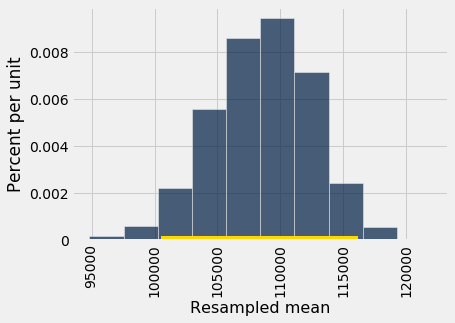

In [20]:
bootstrap_ci_mean(sample, 'Total Compensation', 1000)

Based on the formula,
\begin{equation*}
sample`mean`SD = \frac{population`SD}{\sqrt{sample`size}}
\end{equation*}

In [ ]:
sample mean is sampl